<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/Features_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns


In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Check missing values
df.isnull()
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
df.shape

(891, 15)

In [8]:
df["age_median"] = df["age"].fillna(df["age"].median())
display(df[["age","age_median"]])

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [9]:
#delete the rows
df.dropna().shape

(182, 16)

<Axes: xlabel='age', ylabel='Count'>

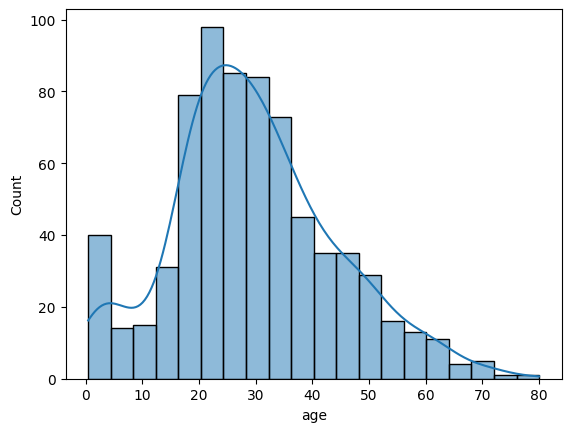

In [10]:
#Imputation techniques
#1. mean value imputation
sns.histplot(df["age"],kde = True)

In [11]:
df["Age_mean"] = df["age"].fillna(df["age"].mean())

In [12]:
df[["Age_mean", "age"]]
#mean inputation works well when you have a normally distributed data

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [14]:
#median value inputation (for outliers)

df["age_median"] = df["age"].fillna(df["age"].median())
df[["age_median", "Age_mean", "age"]]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [15]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,Age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [16]:
#Mode Imputation Techniques
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
mode_value = df[df['embarked'].notna()]["embarked"].mode()[0]
df["embarked"] = df["embarked"].fillna(mode_value)

In [18]:
df["embarked"].isnull().sum()

np.int64(0)

In [19]:
df["embarked"].isnull().sum()

np.int64(0)

In [20]:
import numpy as np
import pandas as pd

In [21]:
np.random.seed(123)
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [22]:
n_class_0, n_class_1

(900, 100)

In [34]:
#create my dataframe with imbalance dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] *  n_class_0 # Set target to 0 for class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] *  n_class_1 # Set target to 1 for class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [24]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [25]:
df["target"].value_counts()

,count
target,
1,1000


In [41]:
len(df_majority)


0

In [39]:
#upsampling
df_minority_upsampled = df[df["target"] == 1] # Minority class is 1
df_majority_upsampled = df[df["target"] == 0] # Majority class is 0

In [42]:
# Separate majority and minority classes correctly
df_majority = df[df["target"] == df["target"].value_counts().idxmax()]
df_minority = df[df["target"] == df["target"].value_counts().idxmin()]


In [43]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace=True, # sample with replacement
    n_samples=len(df_majority),
    random_state=42
    )

In [44]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.720464,4.175706,1
992,1.927428,3.018077,1
914,2.850840,2.058938,1
971,1.536417,0.953271,1
960,1.197962,2.512859,1
...,...,...,...
952,0.376319,2.097916,1
965,1.682427,3.061967,1
976,2.241443,3.765230,1
942,1.473715,-0.084314,1


In [45]:
df_minority_upsampled.shape

(900, 3)

In [46]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.720464,4.175706,1
992,1.927428,3.018077,1
914,2.850840,2.058938,1
971,1.536417,0.953271,1
960,1.197962,2.512859,1


In [47]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [48]:
df_upsampled["target"].value_counts()

,count
target,
0,900
1,900


In [51]:
#downsampling
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [52]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, # sample with replacement
    n_samples=len(df_minority),
    random_state=42
)

In [55]:
df_majority_downsampled.shape

(100, 3)

In [57]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [58]:
df_downsampled["target"].value_counts()

,count
target,
1,100
0,100


In [59]:
#sampling using smote
from sklearn.datasets import make_classification

In [68]:
X,y = make_classification(n_samples = 1000,n_redundant=0, n_features= 2, n_clusters_per_class= 1, weights= [0.90], random_state= 12)

In [69]:
import pandas as pd

In [70]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [71]:
final_df["target"].value_counts()

,count
target,
0,900
1,100


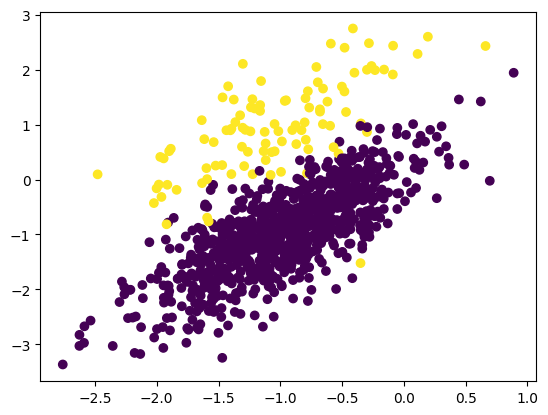

In [72]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"],c=final_df["target"])
plt.show()

In [73]:
!pip install imblearn

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
#transfer the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])

In [77]:
X.shape

(1800, 2)

In [78]:
y.shape

(1800,)

In [79]:
len(y[y==0])

900

In [80]:
len(y[y==1])

900

In [81]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])
oversampled_df = pd.concat([df1,df2],axis=1)
oversampled_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


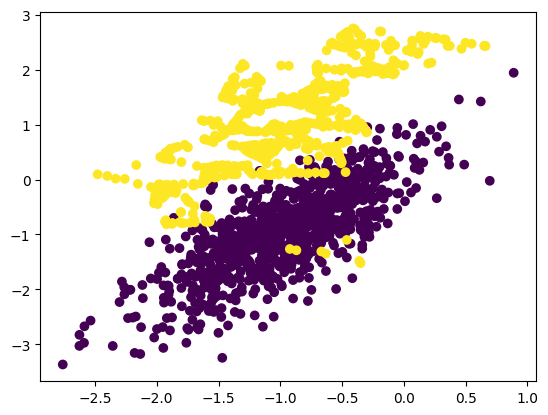

In [82]:
plt.scatter(oversampled_df["f1"],oversampled_df["f2"],c=oversampled_df["target"])
plt.show()

In [86]:
#minimum, maximum, median,Q1,Q2,Q3
import numpy as np

In [89]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [91]:
minimum,Q1,Q3,maximum

(np.float64(32.0), np.float64(54.0), np.float64(89.0), np.float64(99.0))

In [92]:
IQR = Q3-Q1
print(IQR)

35.0


In [93]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)

In [94]:
lower_fence

np.float64(1.5)

In [95]:
higher_fence

np.float64(141.5)

In [ ]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<Axes: >

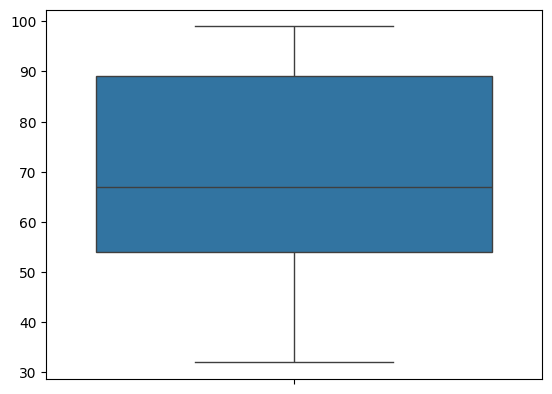

In [96]:
sns.boxplot(lst_marks)

In [98]:
lst_marks = [-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,180]

<Axes: >

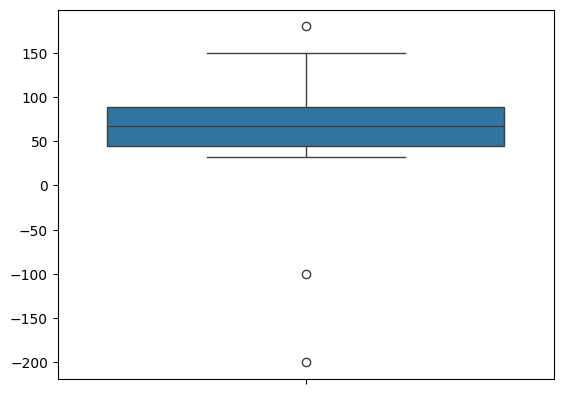

In [99]:
sns.boxplot(lst_marks)

In [100]:
#data encoding
from sklearn.preprocessing import OneHotEncoder

In [101]:
#creating a simple dataframe
df = pd.DataFrame({
    "color": ["red","blue","green","green","red","blue"]
})

In [102]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [103]:
encoder = OneHotEncoder()

In [107]:
encoded = encoder.fit_transform(df[["color"]]).toarray()

In [109]:
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [110]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [112]:
encoder.transform([["blue"]]).toarray() #for new data

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [113]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [115]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [116]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

In [117]:
lbl_encoder.fit_transform(df["color"])

array([2, 0, 1, 1, 2, 0])

In [119]:
lbl_encoder.transform([["red"]])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [120]:
lbl_encoder.transform([["blue"]])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [121]:
lbl_encoder.transform([["green"]])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [122]:
#ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [123]:
df = pd.DataFrame({
    "size": ["small","medium","large","medium","small","large"]
})

In [124]:
encoder = OrdinalEncoder(categories=[["small","medium","large"]])

In [125]:
encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [128]:
df = pd.DataFrame({
    "city":["New York", "London", "Paris", "Tokyo","New YOrk", "Paris"],
    "price": [200,150,300,250,150,320]
    })

In [129]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New YOrk,150
5,Paris,320


In [131]:
mean_price = df.groupby("city")["price"].mean().to_dict()

In [132]:
df["city_encoded"] = df["city"].map(mean_price)

In [133]:
df

,city,price,city_encoded
0,New York,200,200.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New YOrk,150,150.0
5,Paris,320,310.0
